Instalacion de librerias

In [1]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


PRESENTACION DEL DATASET, SELECCION DE VARIABLES Y VISUALIZACION DEL MISMO

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"    #Dataset

column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"] 

auto_mpg = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")                   # Usamos sep='\s+' para separar correctamente por espacios múltiples

auto_mpg = auto_mpg.dropna()                                                                # Elimina filas con valores nulos

print(auto_mpg.head())                                                                      # Mostramos las primeras líneas del archivo para ver si está bien cargado

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gonza\AppData\Local\Temp\ipykernel_22968\3645210513.py:7: SyntaxWarning: invalid escape sequence '\s'
  auto_mpg = pd.read_csv(url, names=column_names, sep='\s+', na_values="?") # Usamos sep='\s+' para separar correctamente por espacios múltiples


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [3]:
auto_mpg = auto_mpg.dropna()    # Elimina filas con valores nulos

print(auto_mpg.head())          # Mostramos las primeras líneas del archivo para ver si está bien cargado

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


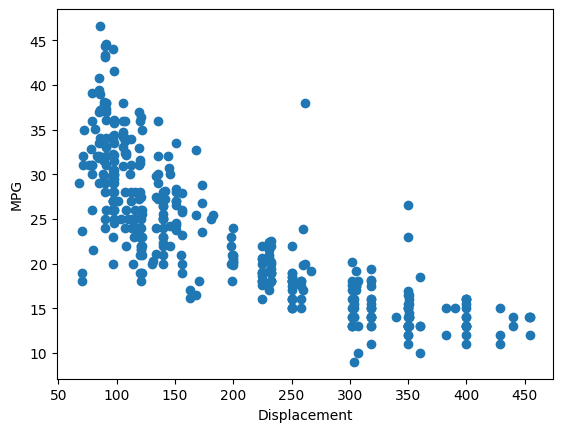

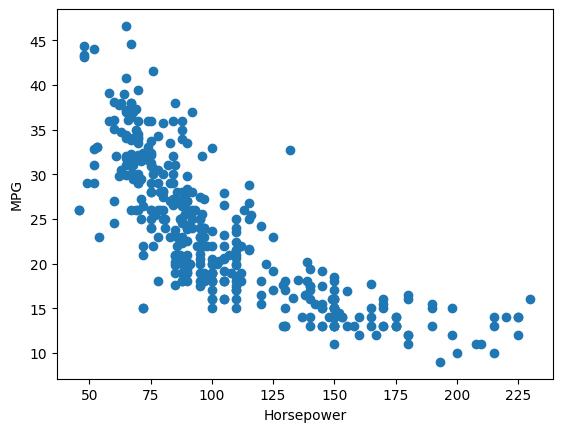

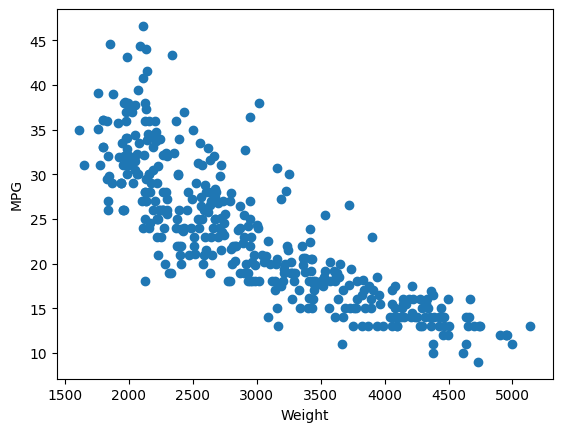

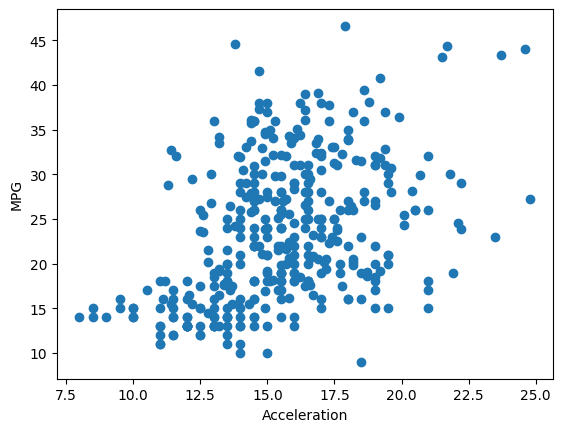

In [4]:
import matplotlib.pyplot as plt 
for col in ["displacement", "horsepower", "weight", "acceleration"]:
  plt.scatter(auto_mpg[col], auto_mpg["mpg"])
  plt.xlabel(col.capitalize())
  plt.ylabel("MPG")
  plt.show()

Regresion Lineal Simple

In [7]:
X = auto_mpg["displacement"].values.reshape(-1, 1)  # Extrae los valores de la columna "displacement" y los reorganiza en una matriz columna
print(X)

y = auto_mpg["mpg"].values                          # Extrae los valores de la columna "mpg" como el array de etiquetas (objetivo)
print(y)

print(f"Largo: {len(auto_mpg)}")                    # Calcula y muestra la cantidad total de filas en el DataFrame

[[307. ]
 [350. ]
 [318. ]
 [304. ]
 [302. ]
 [429. ]
 [454. ]
 [440. ]
 [455. ]
 [390. ]
 [383. ]
 [340. ]
 [400. ]
 [455. ]
 [113. ]
 [198. ]
 [199. ]
 [200. ]
 [ 97. ]
 [ 97. ]
 [110. ]
 [107. ]
 [104. ]
 [121. ]
 [199. ]
 [360. ]
 [307. ]
 [318. ]
 [304. ]
 [ 97. ]
 [140. ]
 [113. ]
 [232. ]
 [225. ]
 [250. ]
 [250. ]
 [232. ]
 [350. ]
 [400. ]
 [351. ]
 [318. ]
 [383. ]
 [400. ]
 [400. ]
 [258. ]
 [140. ]
 [250. ]
 [250. ]
 [122. ]
 [116. ]
 [ 79. ]
 [ 88. ]
 [ 71. ]
 [ 72. ]
 [ 97. ]
 [ 91. ]
 [113. ]
 [ 97.5]
 [ 97. ]
 [140. ]
 [122. ]
 [350. ]
 [400. ]
 [318. ]
 [351. ]
 [304. ]
 [429. ]
 [350. ]
 [350. ]
 [400. ]
 [ 70. ]
 [304. ]
 [307. ]
 [302. ]
 [318. ]
 [121. ]
 [121. ]
 [120. ]
 [ 96. ]
 [122. ]
 [ 97. ]
 [120. ]
 [ 98. ]
 [ 97. ]
 [350. ]
 [304. ]
 [350. ]
 [302. ]
 [318. ]
 [429. ]
 [400. ]
 [351. ]
 [318. ]
 [440. ]
 [455. ]
 [360. ]
 [225. ]
 [250. ]
 [232. ]
 [250. ]
 [198. ]
 [ 97. ]
 [400. ]
 [400. ]
 [360. ]
 [350. ]
 [232. ]
 [ 97. ]
 [140. ]
 [108. ]
 [ 70. ]
 

Vamos a utilizar segmentos fijos del conjunto de datos para evitar la aleatoridad de los resultados. Sin embargo, es importante que recuerden las consecuencias negativas de emplear un enfoque asi.

In [8]:
# Divide los datos en conjuntos de entrenamiento (80% de los datos)
x_train = X[:int(len(auto_mpg)*0.8)]                                # Selecciona el 80% inicial de los datos de "displacement" para entrenamiento
y_train = y[:int(len(auto_mpg)*0.8)]                                # Selecciona el 80% inicial de las etiquetas "mpg" para entrenamiento
print(f"Largo conjunto entrenamiento:{len(x_train)}")               # Muestra el tamaño del conjunto de entrenamiento

# Divide los datos en conjuntos de prueba (20% de los datos restantes)
x_test = X[int(len(auto_mpg)*0.8):]                                 # Selecciona el 20% restante de los datos de "displacement" para prueba
y_test = y[int(len(auto_mpg)*0.8):]                                 # Selecciona el 20% restante de las etiquetas "mpg" para prueba
print(f"Largo conjunto pruebas:{len(x_test)}")                      # Muestra el tamaño del conjunto de prueba

Largo conjunto entrenamiento:313
Largo conjunto pruebas:79


Definicion Modelo

In [9]:
import statsmodels.api as sm  # Importa la biblioteca statsmodels para análisis estadístico

X_train_sm = sm.add_constant(x_train)       # Agrega una constante a los datos de entrenamiento para incluir el término independiente

model = sm.OLS(y_train, X_train_sm).fit()   # Crea y ajusta el modelo de regresión lineal ordinaria (OLS) usando los datos de entrenamiento

print(model.summary())                      # Imprime un resumen detallado de los resultados del modelo

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     707.7
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.06e-82
Time:                        23:50:34   Log-Likelihood:                -853.28
No. Observations:                 313   AIC:                             1711.
Df Residuals:                     311   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1838      0.459     70.165      0.0

Validacion con datos de prueba

In [10]:
import numpy as np                                  # Importa la biblioteca NumPy para cálculos numéricos

# Realiza predicciones sobre los datos de prueba (x_test) usando el modelo
y_pred = model.predict(sm.add_constant(x_test))     # Agrega constante a x_test y predice y


mse = np.mean((y_test - y_pred)**2)                 # Calcula el error cuadrático medio (MSE) comparando las predicciones con los valores reales

print(f"{mse}")

63.84473843348609


Visualizador del modelo

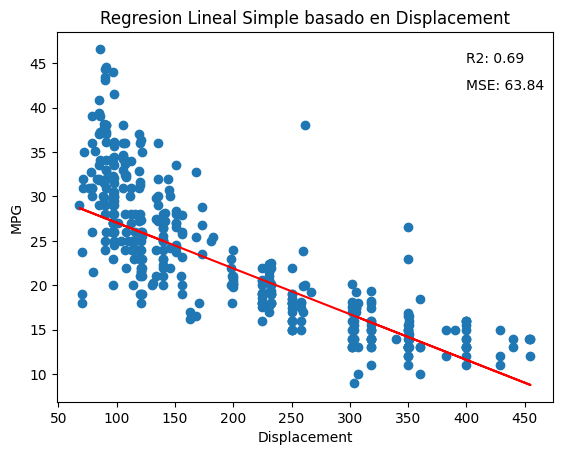

In [11]:
plt.scatter(auto_mpg["displacement"], auto_mpg["mpg"])
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.plot(x_train, model.predict(sm.add_constant(x_train)), color="red")
plt.title("Regresion Lineal Simple basado en Displacement")
plt.text(400, 45, f"R2: {model.rsquared:.2f}")
plt.text(400, 42, f"MSE: {mse:.2f}")
plt.show()

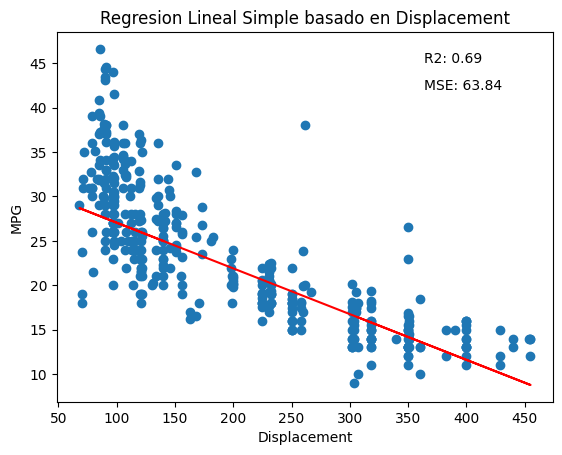

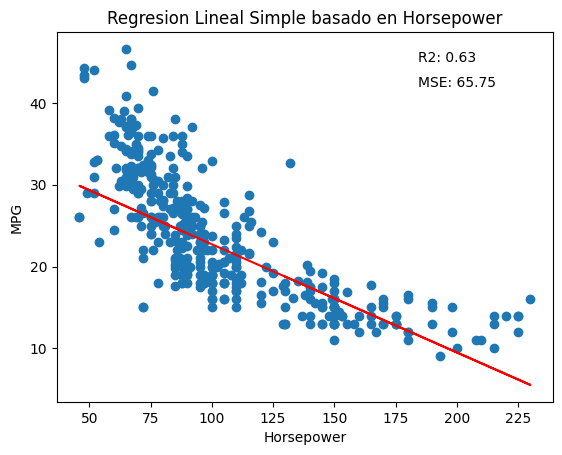

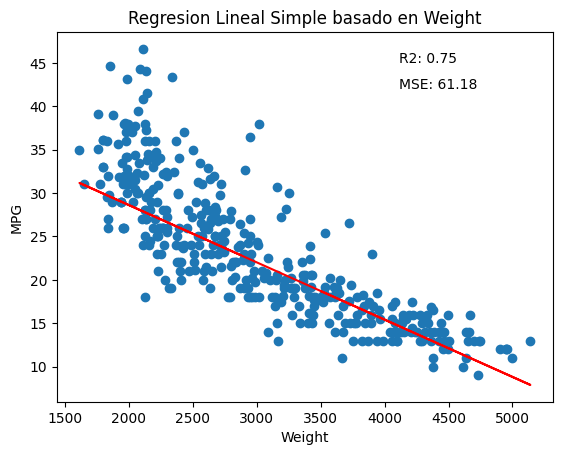

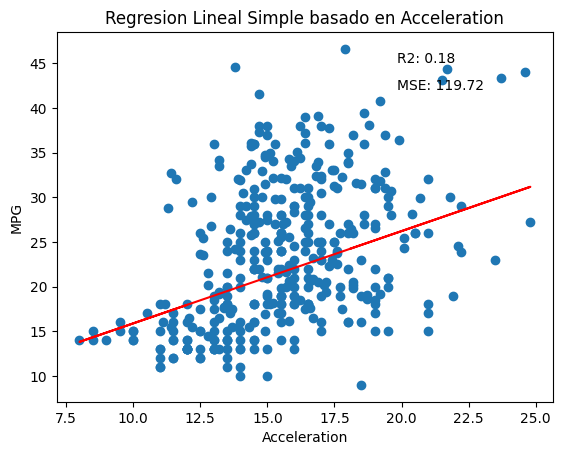

In [12]:
independent_variables = ["displacement", "horsepower", "weight", "acceleration"]
for i in independent_variables:
  X = auto_mpg[i].values.reshape(-1, 1)
  y = auto_mpg["mpg"].values

  x_train = X[:int(len(auto_mpg)*0.8)]
  y_train = y[:int(len(auto_mpg)*0.8)]
  x_test = X[int(len(auto_mpg)*0.8):]
  y_test = y[int(len(auto_mpg)*0.8):]

  X_train_sm = sm.add_constant(x_train)
  model = sm.OLS(y_train, X_train_sm).fit()
  y_pred = model.predict(sm.add_constant(x_test))
  mse = np.mean((y_test - y_pred)**2)

  plt.scatter(auto_mpg[i], auto_mpg["mpg"])
  plt.xlabel(i.capitalize())
  plt.ylabel("MPG")
  plt.plot(x_train, model.predict(sm.add_constant(x_train)), color="red")
  plt.title("Regresion Lineal Simple basado en " + i.capitalize())
  plt.text(max(x_train*0.8), 45, f"R2: {model.rsquared:.2f}")
  plt.text(max(x_train*0.8), 42, f"MSE: {mse:.2f}")
  plt.show()

R^2: Cuanto mayor sea este valor, indica que el modelo se ajusta mejor a los datos.
MSE: Proporciona una medida de la precision de las predicciones, cuanto menor sea, Mejor.

REGRESION LINEAL MULTIPLE

In [22]:
# Imprimir los tipos de datos de cada columna en el DataFrame

X = auto_mpg.drop(columns=["mpg","car_name"])          # Extraer características (features) excluyendo la variable objetivo 'mpg'
y = auto_mpg["mpg"].values                  # Guardar la variable objetivo 'mpg' como un array

X = sm.add_constant(X)                      # Agregar una constante para el término independiente en la regresión

# Dividir los datos en conjuntos de entrenamiento y prueba (80%/20%)
train_size = int(len(auto_mpg) * 0.8)       # Calcular el tamaño del conjunto de entrenamiento
x_train = X[:train_size]                    # Asignar las características del conjunto de entrenamiento
y_train = y[:train_size]                    # Asignar la variable objetivo del conjunto de entrenamiento

x_test = X[train_size:]                     # Asignar las características del conjunto de prueba
y_test = y[train_size:]                     # Asignar la variable objetivo del conjunto de prueba

# Ajustar el modelo de regresión multiple
model = sm.OLS(y_train, x_train).fit()      # Crear y ajustar el modelo OLS (Ordinary Least Squares)

# Imprimir el resumen del modelo
print(model.summary())                      # Mostrar los resultados del modelo

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          5.60e-110
Time:                        00:38:10   Log-Likelihood:                -769.61
No. Observations:                 313   AIC:                             1555.
Df Residuals:                     305   BIC:                             1585.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5828      5.076     -0.312   

Validacion Datos De Prueba

In [23]:
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
print(f"MSE: {mse}")

MSE: 27.462731832359008
